This code is essentially teaching a computer to predict the next letter in a word, based on the letters it has seen so far. Imagine you're trying to guess the end of a word like "oliv...", and you want the computer to guess "ia".

Here's the breakdown:

1.  **Preparation**: The process starts by loading a list of names from a file. This list serves as the computer's learning material. All the unique letters found in these names are identified and given a special numerical code.

2.  **Building the "Brain" (Neural Network)**: A simple artificial "brain," called a neural network, is created. This brain has a few key parts:
    *   **Character Fingerprints (Embedding Layer)**: Instead of directly using letters, the brain assigns a unique numerical "fingerprint" (an embedding) to each letter. Letters that appear in similar contexts in words will end up with similar fingerprints.
    *   **Hidden Processing Layer**: This part takes the character fingerprints and processes them to find patterns and relationships between the letters.
    *   **Output Layer**: This is the final part that uses the processed information to make a prediction about what the next letter should be.

3.  **Training the Brain**: The brain then undergoes a training process, much like a student learning from examples:
    *   It's repeatedly shown sequences of letters from the loaded names (e.g., "oli").
    *   For each sequence, it tries to predict the very next letter (e.g., if the word is "olivia", it would predict 'v' after "oli", 'i' after "liv", and so on).
    *   It compares its prediction to the actual next letter. If it's wrong, it calculates how big its mistake was.
    *   Based on these mistakes, the brain adjusts its internal settings (the connections within its layers) to get better at making correct predictions in the future. This adjustment process happens thousands of times over many "epochs" (training cycles). The goal is to minimize its errors.

4.  **Monitoring Progress**: As the brain learns, its "error score" (called loss) is tracked and plotted on a graph. Ideally, this graph should show the error score decreasing over time, indicating that the brain is getting smarter.

5.  **Generating New Words**: After training, the brain is put to the test:
    *   You give it a starting sequence of letters (e.g., "oli").
    *   The brain uses its learned patterns to predict the most likely next letter.
    *   It adds this predicted letter to the sequence (e.g., "oliv").
    *   Then, it takes the *last few* letters of this new sequence (e.g., "liv") and feeds them back into itself to predict the *next* letter. This process repeats, gradually building out a new, generated word (e.g., "olivia").

6.  **Visualizing Learnings**: Finally, the code can also create a visual map of the "fingerprints" (embeddings) for each character. This map helps to see how the brain groups similar characters together based on the patterns it learned from the names. For example, vowels might cluster together, or letters that often follow each other might appear close on the map.

In essence, the code builds a simple predictive text model that learns the statistical patterns of character sequences from a list of names and then uses those patterns to generate new, name-like sequences of characters.

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [5]:
len(words)

32033

In [158]:
vocab =''.join(words)


In [159]:
vocab =sorted(set(''.join(words)))

In [10]:
i2s = {i+1:j for i,j in enumerate(vocab)}

In [17]:
s2i = {j:i+1 for i,j in enumerate(vocab)}

In [103]:
i2s[0] = '.'
s2i['.'] = 0
s2i

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [20]:
s2i[i2s[12]]

12

In [160]:
x= []
y= []
context_window = 3
context = [0] * context_window

for word in words:
    for char in  word:
        ix = s2i[char]
        x.append(context)
        y.append(ix)
        context = context[1:] + [ ix]

In [161]:
len(x)

196113

In [162]:
len(y)

196113

In [169]:
x = torch.tensor(x)
y = torch.tensor(y)
x.shape, y.shape

C:\Users\user\AppData\Local\Temp\ipykernel_8636\3575877793.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
C:\Users\user\AppData\Local\Temp\ipykernel_8636\3575877793.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


(torch.Size([196113, 3]), torch.Size([196113]))

In [105]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyTextModel(nn.Module):
    def __init__(self, input_dim,embedding_dim, hidden_dim, output_dim,vocab_size ):
        super( MyTextModel,self).__init__()
        self.emb = nn.Embedding(vocab_size, embedding_dim)
        self.hidden = nn.Linear(embedding_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = self.emb(x)
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x
         
         

In [163]:
torch.manual_seed(42)
model = MyTextModel(3,2,16,len(vocab)+1,len(vocab)+1)

In [164]:
model.parameters

<bound method Module.parameters of MyTextModel(
  (emb): Embedding(27, 2)
  (hidden): Linear(in_features=2, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=27, bias=True)
)>

In [170]:
torch.manual_seed(42)
model = MyTextModel(3,8,16,len(vocab)+1,len(vocab)+1)

In [154]:
#training loop
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = F.cross_entropy

lossi = []
stepi = []
counter = 0

model.train()
for epoch in range (800):
        i_x = torch.randint(low=0, high=len(x), size=(1024*16,))
        input_data = x[i_x]
        output_data = y[i_x].long()
        predict = model(input_data)
        predict = predict.mean(dim=1)
        predict = predict.view(-1, predict.size(-1)) 
        output_data = output_data.view(-1) 
        loss = criterion(predict, output_data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
        stepi.append(counter)
        counter += 1


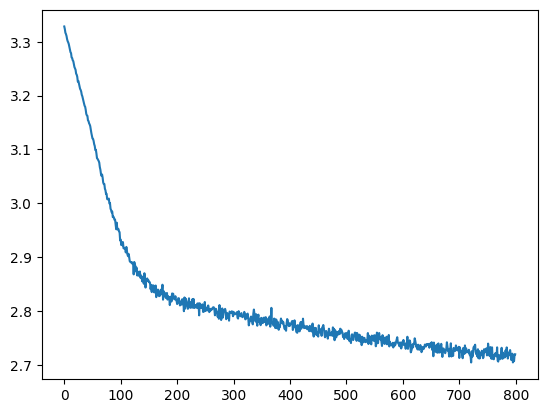

In [155]:
import matplotlib.pyplot as plt 
plt.plot(stepi,lossi)

In [156]:
model.eval()
input_chars = ['o', 'l', 'i']
input_vals = torch.tensor([[s2i[c] for c in input_chars]], dtype=torch.long)  

result = input_chars.copy()

for _ in range(3):
    output = model(input_vals)  
    last_timestep_logits = output[:, -1, :]  
    probs = F.softmax(last_timestep_logits, dim=-1)  
    next_idx = torch.multinomial(probs, 1).item()
    next_char = i2s[next_idx]
    result.append(next_char)

    new_input = result[-3:]
    input_vals = torch.tensor([[s2i[c] for c in new_input]], dtype=torch.long)

generated_text = ''.join(result)
print(generated_text)


oliani


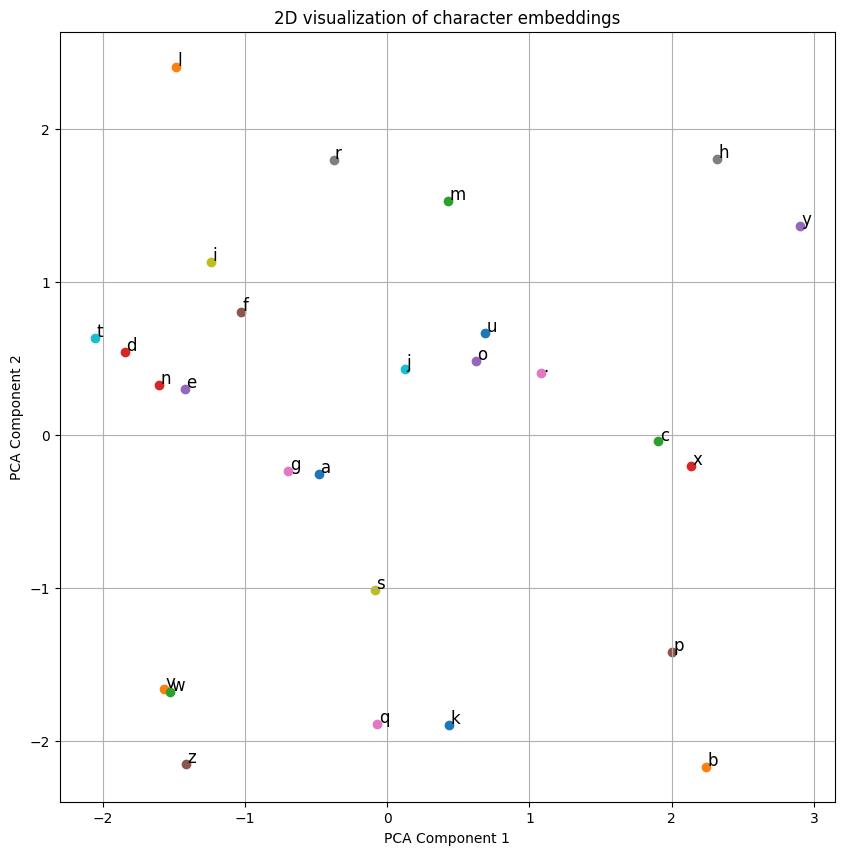

In [157]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch

embedding_weights = model.emb.weight.data.cpu().numpy() 

pca = PCA(n_components=2)
embedding_2d = pca.fit_transform(embedding_weights)

plt.figure(figsize=(10, 10))
for char, idx in s2i.items():
    a, b = embedding_2d[idx]
    plt.scatter(a, b)
    plt.text(a+0.01, b+0.01, char, fontsize=12)

plt.title("2D visualization of character embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()
